## Diabetes Prediction

The objective of these project is to develop a model that predicts whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

### *Objectives*

* Develop a model that will predict whether or not a patient has diabetes.
* Explore the relationships between various medical and demographic factors in relation to diabetes.


In [1]:
#importing necessary packages 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder


In [2]:
# defining a function that reads and summarizes a data set 
def read_csv_and_summarize(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Display information about the DataFrame
    print("DataFrame Info:")
    print(df.info())
    
    # Display the first few rows of the DataFrame
    print("\nDataFrame Head:")
    print(df.head())
    
    # Display the last few rows of the DataFrame
    print("\nDataFrame Tail:")
    print(df.tail())
    
    # Display summary statistics of the DataFrame
    print("\nDataFrame Summary Statistics:")
    print(df.describe())

#### diabetes_prediction_dataset

A collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

In [3]:
# Loading diabetes_prediction_dataset.csv
pred_df = 'Data/diabetes_prediction_dataset.csv'
read_csv_and_summarize(pred_df)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

DataFrame Head:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0  

#### diabetes _ 012 _ health _ indicators

Data collected through the Behavioral Risk Factor Surveillance System (BRFSS) a health-related telephone survey that is collected annually by the CDC.The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes.

In [3]:
# Loading diabetes_prediction_dataset.csv
health_df = 'Data/diabetes_012_health_indicators_BRFSS2015.csv'
read_csv_and_summarize(health_df)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-nul

In [4]:
# Load the diabetes_prediction_dataset.csv
pred_df = pd.read_csv('Data/diabetes_prediction_dataset.csv')

In [5]:
# Load the diabetes_012_health_indicators_BRFSS2015.csv 
health_df = pd.read_csv('Data/diabetes_012_health_indicators_BRFSS2015.csv')

## Data Cleaning

In [7]:
# Function to check outliers
def find_outliers(data_list):
    # Sort the data in ascending order
    sorted_data = sorted(data_list)
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1_index = int(len(sorted_data) * 0.25)
    q3_index = int(len(sorted_data) * 0.75)
    q1 = sorted_data[q1_index]
    q3 = sorted_data[q3_index]
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Find the outliers in the dataset
    outliers = [x for x in data_list if x < lower_bound or x > upper_bound]
    
    return outliers


### diabetes_prediction_dataset

In [8]:
#Checking for nulls
null_counts = pred_df.isnull().sum()

In [9]:
print(null_counts)

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [10]:
# Checking for duplicates 
duplicated_counts = pred_df.duplicated().sum()

In [11]:
# Display the sum of duplicated data
print("Number of duplicate rows:", duplicated_counts)

Number of duplicate rows: 3854


In [12]:
# Use duplicated() to create a boolean Series where True indicates a duplicate row (keep=False marks all duplicates as True)
duplicates = pred_df.duplicated(keep=False)

# Use boolean indexing to filter and display the duplicate rows
duplicate_rows = pred_df[duplicates]

# Display the duplicate rows
print(duplicate_rows)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
1      Female  54.0             0              0         No Info  27.32   
10     Female  53.0             0              0           never  27.32   
14     Female  76.0             0              0         No Info  27.32   
18     Female  42.0             0              0         No Info  27.32   
41       Male   5.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
1              6.6                   80        

In [13]:
numeric_columns = pred_df.select_dtypes(include='number')

In [14]:
# Checking for outliers in the numeric columns
#outliers = find_outliers(numeric_columns)

# Print the outliers
#print("Outliers:", outliers)


### diabetes _ 012 _ health _ indicators

In [15]:
#Checking for nulls
null_counts = health_df.isnull().sum()

In [16]:
print(null_counts)

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [17]:
# Checking for duplicates 
duplicated_counts = health_df.duplicated().sum()

In [18]:
# Display the sum of duplicated data
print("Number of duplicate rows:", duplicated_counts)

Number of duplicate rows: 23899


In [19]:
# Use duplicated() to create a boolean Series where True indicates a duplicate row (keep=False marks all duplicates as True)
duplicates = health_df.duplicated(keep=False)

# Use boolean indexing to filter and display the duplicate rows
duplicate_rows = health_df[duplicates]

# Display the duplicate rows
print(duplicate_rows)

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
5                0.0     1.0       1.0        1.0  25.0     1.0     0.0   
25               0.0     0.0       0.0        1.0  32.0     0.0     0.0   
29               0.0     0.0       1.0        1.0  31.0     1.0     0.0   
44               0.0     0.0       1.0        1.0  31.0     1.0     0.0   
52               2.0     1.0       1.0        1.0  27.0     1.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253492           2.0     1.0       1.0        1.0  33.0     0.0     0.0   
253550           0.0     0.0       0.0        1.0  25.0     0.0     0.0   
253563           0.0     0.0       1.0        1.0  24.0     1.0     0.0   
253597           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
253638           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
5                        

In [20]:
numeric_columns = health_df.select_dtypes(include='number')

## Data Exploration

### *Univariate Analysis*

In [21]:
def univariate_analysis(df, column_name):
    # Get the specified column from the DataFrame
    column_data = df[column_name]
    
    # Display basic summary statistics
    print("Summary Statistics:")
    print(column_data.describe())
    
    # Plot a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(column_data, kde=False)
    plt.title(f"Histogram of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.show()
    
    # Plot a bar chart for categorical data
    if pd.api.types.is_categorical_dtype(column_data):
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column_name, data=df)
        plt.title(f"Bar Chart of {column_name}")
        plt.xlabel(column_name)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

### diabetes_prediction_dataset

In [22]:
# Getting the columns within the pred_df dataset
column_names = pred_df.columns
print(column_names)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


Summary Statistics:
count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64


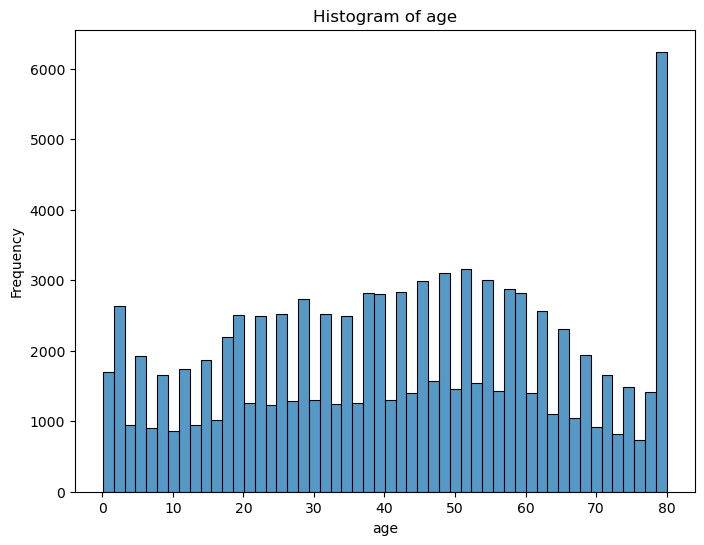

In [23]:
# perform univariate analysis on 'age' column
univariate_analysis(pred_df, 'age')

Summary Statistics:
count    100000.000000
mean          0.085000
std           0.278883
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: diabetes, dtype: float64


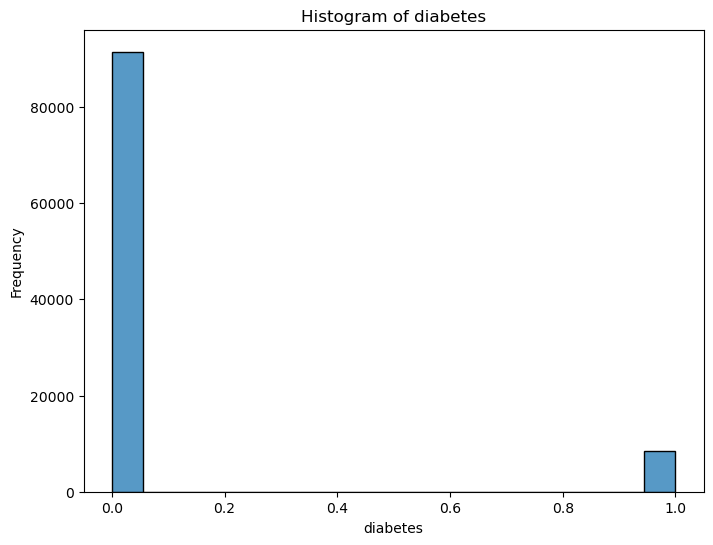

In [24]:
univariate_analysis(pred_df, 'diabetes')

In [25]:
# Filter the DataFrame to keep only rows where diabetes column is equal to 1(has diabetes)
filtered_pred_df = pred_df[pred_df['diabetes'] == 1]

# Display the first few rows of the filtered DataFrame
print(filtered_pred_df.head())

    gender   age  hypertension  heart_disease smoking_history    bmi  \
6   Female  44.0             0              0           never  19.31   
26    Male  67.0             0              1     not current  27.32   
38    Male  50.0             1              0         current  27.32   
40    Male  73.0             0              0          former  25.91   
53  Female  53.0             0              0          former  27.32   

    HbA1c_level  blood_glucose_level  diabetes  
6           6.5                  200         1  
26          6.5                  200         1  
38          5.7                  260         1  
40          9.0                  160         1  
53          7.0                  159         1  


#### What are the ages of those that have diabetes ?

Summary Statistics:
count    8500.000000
mean       60.946588
std        14.549880
min         3.000000
25%        52.000000
50%        62.000000
75%        72.000000
max        80.000000
Name: age, dtype: float64


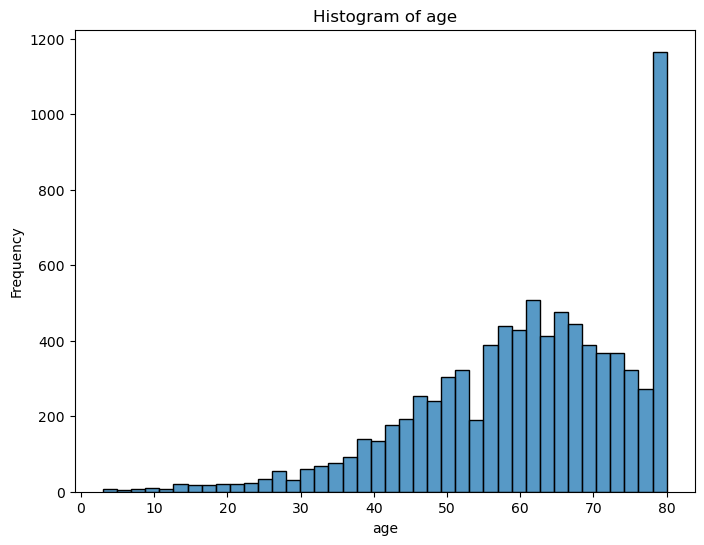

In [26]:
univariate_analysis(filtered_pred_df, 'age')

#### What gender is most likely to have diabetes?

Summary Statistics:
count       8500
unique         2
top       Female
freq        4461
Name: gender, dtype: object


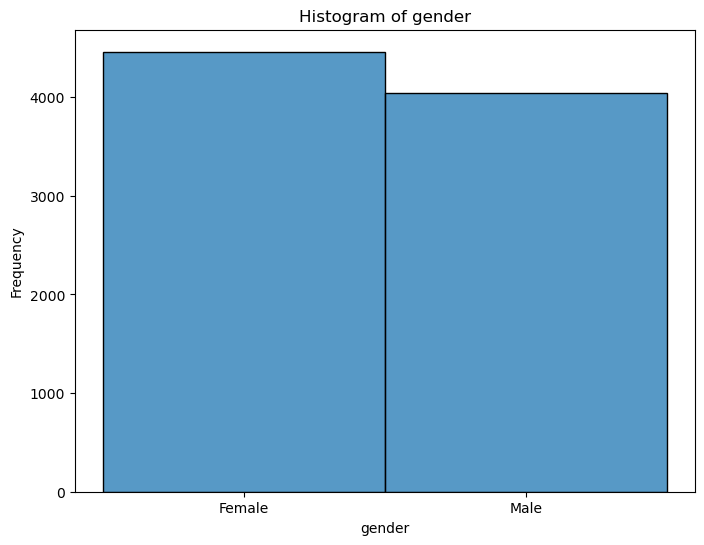

In [27]:
univariate_analysis(filtered_pred_df, 'gender')

#### What's the range of HbA1c_level of those with diabetes?

Summary Statistics:
count    8500.000000
mean        6.934953
std         1.076562
min         5.700000
25%         6.100000
50%         6.600000
75%         7.500000
max         9.000000
Name: HbA1c_level, dtype: float64


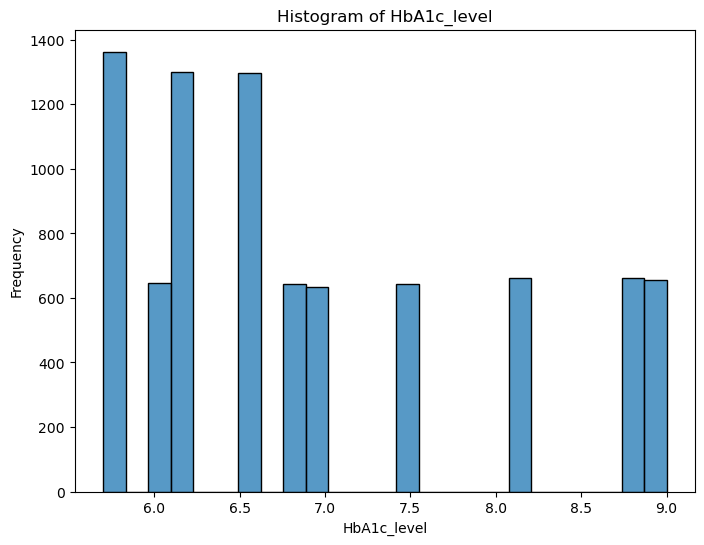

In [28]:
univariate_analysis(filtered_pred_df, 'HbA1c_level')

#### What's are the blood sugar levels of those with diabetes ?

Summary Statistics:
count    8500.000000
mean      194.094706
std        58.641111
min       126.000000
25%       145.000000
50%       160.000000
75%       240.000000
max       300.000000
Name: blood_glucose_level, dtype: float64


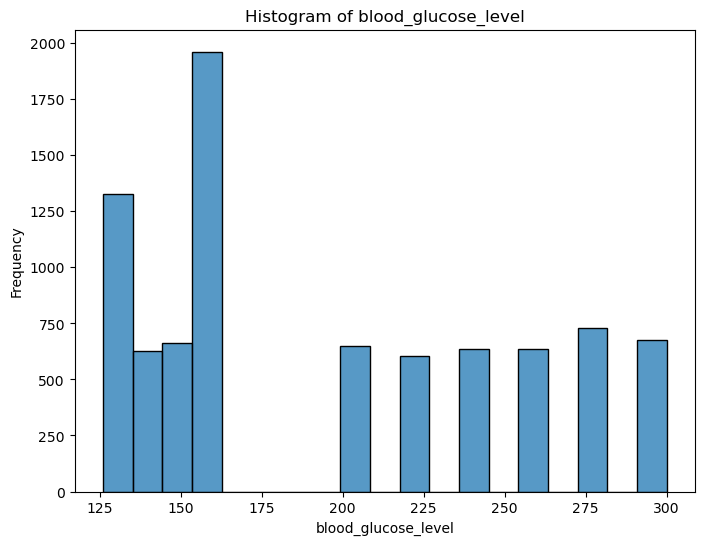

In [29]:
univariate_analysis(filtered_pred_df, 'blood_glucose_level')

#### How many have both hypertension and diabetes ?

Summary Statistics:
count    8500.000000
mean        0.245647
std         0.430496
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64


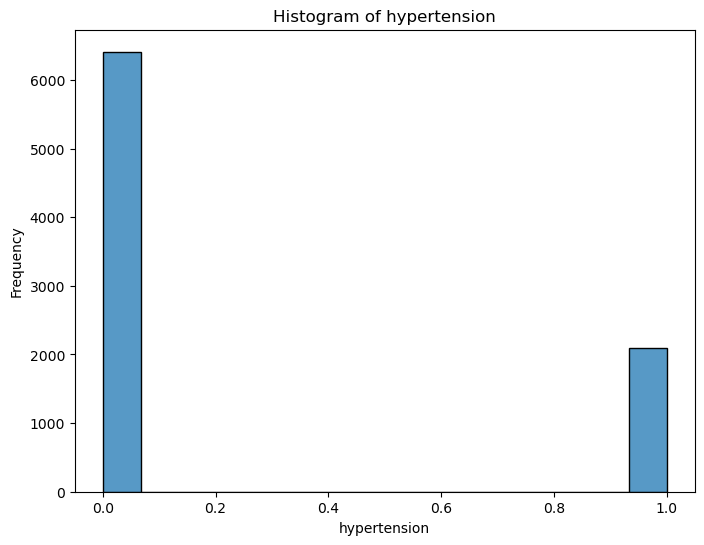

In [30]:
univariate_analysis(filtered_pred_df, 'hypertension')

#### How many have both heart disease and diabetes ?

Summary Statistics:
count    8500.000000
mean        0.149059
std         0.356167
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64


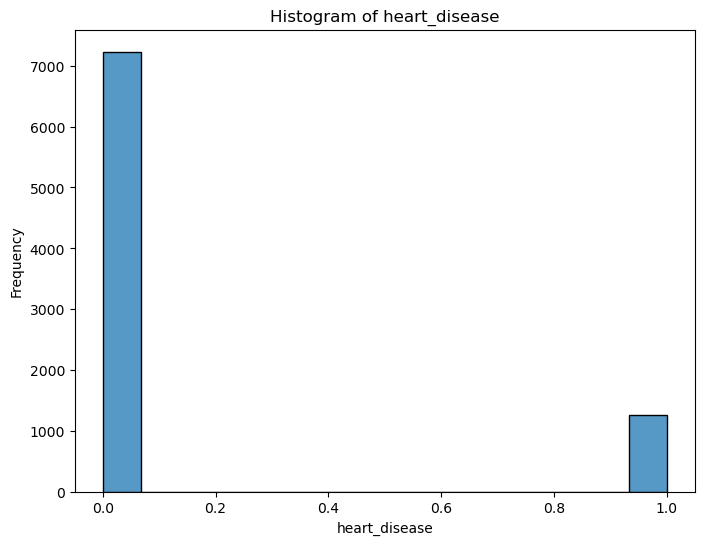

In [31]:
univariate_analysis(filtered_pred_df, 'heart_disease')

#### What's the smoking history of those with diabetes ?

Summary Statistics:
count      8500
unique        6
top       never
freq       3346
Name: smoking_history, dtype: object


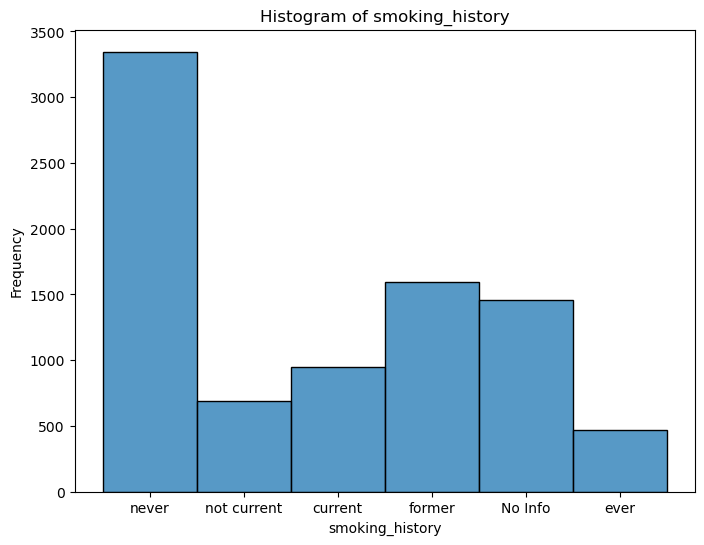

In [32]:
univariate_analysis(filtered_pred_df, 'smoking_history')

### diabetes _ 012 _ health _ indicators

In [33]:
# Getting the columns within the health_df dataset
column_names = health_df.columns
print(column_names)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


Summary Statistics:
count    253680.000000
mean          0.040571
std           0.197294
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Stroke, dtype: float64


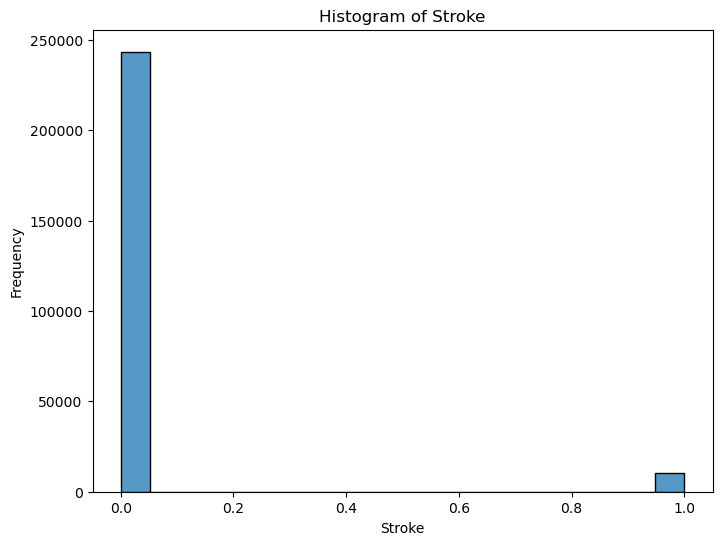

In [34]:
# perform univariate analysis on 'BMI' column
univariate_analysis(health_df, 'Stroke')

### *Bivariate Analysis*

### diabetes_prediction_dataset

#### Smoking history of those with diabetes and without diabetes

In [35]:
# Create a contingency table for diabetes vs. smoking_history
contingency_smoking = pd.crosstab(pred_df['diabetes'], pred_df['smoking_history'])

<Figure size 800x600 with 0 Axes>

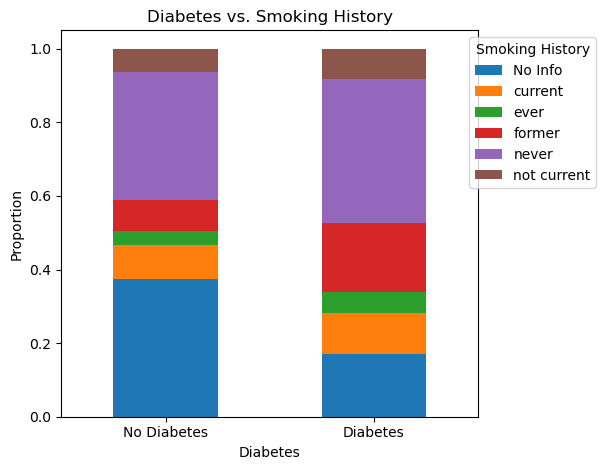

In [36]:
# Plot for diabetes vs. smoking_history
plt.figure(figsize=(8, 6))
smoking_labels = ['No Diabetes', 'Diabetes']
contingency_smoking.div(contingency_smoking.sum(1), axis=0).plot(kind='bar', stacked=True)
plt.title("Diabetes vs. Smoking History")
plt.xlabel("Diabetes")
plt.ylabel("Proportion")
plt.xticks(ticks=[0, 1], labels=smoking_labels, rotation=0)
plt.legend(title="Smoking History", loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

In [37]:
unique_smoking_history = pred_df['smoking_history'].unique()
print(unique_smoking_history)

['never' 'No Info' 'current' 'former' 'ever' 'not current']


#### Gender Comparison count of those with diabetes and no diabetes

In [38]:
# Create a contingency table for diabetes vs. gender
contingency_gender = pd.crosstab(pred_df['diabetes'], pred_df['gender'])

<Figure size 800x600 with 0 Axes>

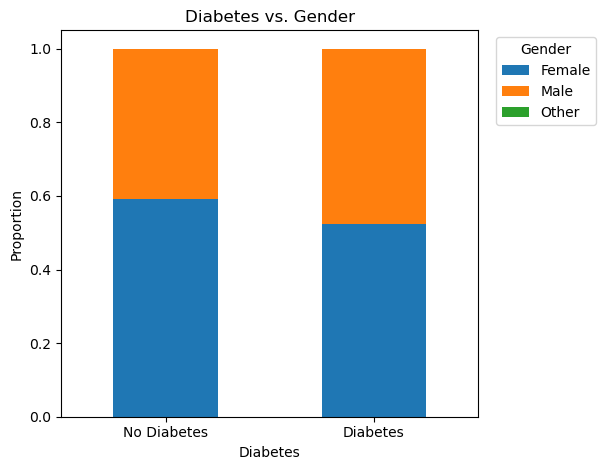

In [39]:
# Plot for diabetes vs. gender
plt.figure(figsize=(8, 6))
gender_labels = ['No Diabetes', 'Diabetes']
contingency_gender.div(contingency_gender.sum(1), axis=0).plot(kind='bar', stacked=True)
plt.title("Diabetes vs. Gender")
plt.xlabel("Diabetes")
plt.ylabel("Proportion")
plt.xticks(ticks=[0, 1], labels=gender_labels, rotation=0)
plt.legend(title="Gender", loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

#### Education  Comparison of those with diabetes and no diabetes

In [6]:
# Create a contingency table for diabetes vs. gender
contingency_education = pd.crosstab(health_df['Diabetes_012'], health_df['Education'])

NameError: name 'education_labels' is not defined

<Figure size 800x600 with 0 Axes>

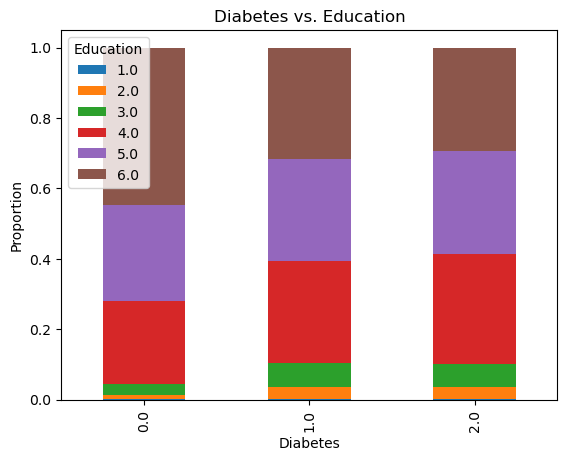

In [7]:
# Plot for diabetes vs. gender
plt.figure(figsize=(8, 6))
diabetes_labels = ['No Diabetes', 'Diabetes']
contingency_education.div(contingency_education.sum(1), axis=0).plot(kind='bar', stacked=True)
plt.title("Diabetes vs. Education")
plt.xlabel("Diabetes")
plt.ylabel("Proportion")
plt.xticks(ticks=[0, 1], labels=education_labels, rotation=0)
plt.legend(title="Education", loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

#### Comparison of other columns those with diabetes vs those without diabetes

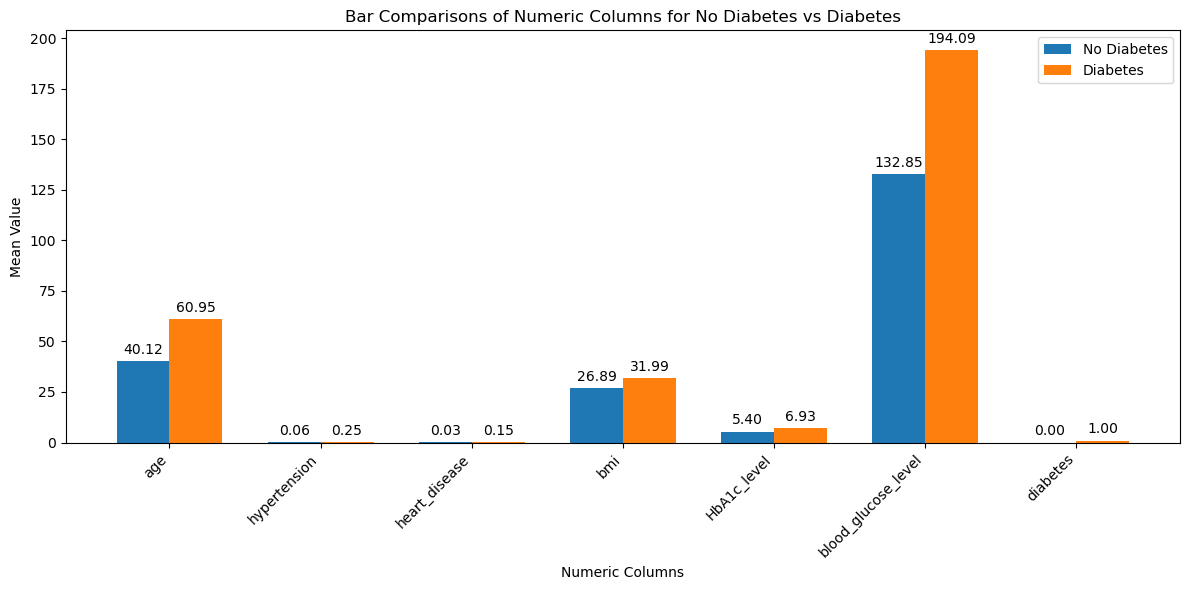

In [40]:
def plot_numeric_column_comparisons(dataframe, target_column):
    # Filter DataFrame for diabetes == 0 and diabetes == 1
    df_diabetes_0 = dataframe[dataframe['diabetes'] == 0]
    df_diabetes_1 = dataframe[dataframe['diabetes'] == 1]

    # Calculate mean for numeric columns in both DataFrames
    numeric_columns = dataframe.select_dtypes(include='number').columns
    means_diabetes_0 = df_diabetes_0[numeric_columns].mean()
    means_diabetes_1 = df_diabetes_1[numeric_columns].mean()

    # Create a bar plot for each numeric column with side-by-side bars
    num_columns = len(numeric_columns)
    width = 0.35
    x = range(num_columns)
    fig, ax = plt.subplots(figsize=(12, 6))
    bars_diabetes_0 = ax.bar(x, means_diabetes_0, width, label="No Diabetes")
    bars_diabetes_1 = ax.bar([i + width for i in x], means_diabetes_1, width, label="Diabetes")

    ax.set_xlabel("Numeric Columns")
    ax.set_ylabel("Mean Value")
    ax.set_title("Bar Comparisons of Numeric Columns for No Diabetes vs Diabetes")
    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(numeric_columns, rotation=45, ha='right')
    ax.legend()

    # Attach a label above each bar showing the exact value
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f"{height:.2f}", xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    autolabel(bars_diabetes_0)
    autolabel(bars_diabetes_1)

    plt.tight_layout()
    plt.show()

# Call the function to plot comparisons for numeric columns
plot_numeric_column_comparisons(pred_df, target_column="diabetes")


### diabetes _ 012 _ health _ indicators

In [41]:
# Specify the column name for which you want to find unique entries
column_name = 'Diabetes_012'

# Get the unique entries in the specified column
unique_entries = health_df[column_name].unique()

# Print the unique entries
print(unique_entries)

[0. 2. 1.]


In [42]:
# Filter the DataFrame to keep only rows where diabetes column is equal to 1(has diabetes)
filtered_health_df = health_df[health_df['Diabetes_012'] != 0]

# Display the first few rows of the filtered DataFrame
print(filtered_health_df.head())

    Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
8            2.0     1.0       1.0        1.0  30.0     1.0     0.0   
10           2.0     0.0       0.0        1.0  25.0     1.0     0.0   
13           2.0     1.0       1.0        1.0  28.0     0.0     0.0   
17           2.0     0.0       0.0        1.0  23.0     1.0     0.0   
23           2.0     1.0       0.0        1.0  27.0     0.0     0.0   

    HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
8                    1.0           0.0     1.0  ...            1.0   
10                   0.0           1.0     1.0  ...            1.0   
13                   0.0           0.0     0.0  ...            1.0   
17                   0.0           1.0     0.0  ...            1.0   
23                   0.0           1.0     1.0  ...            1.0   

    NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
8           0.0      5.0      30.0      30.0       1.0  0.0   9.0       

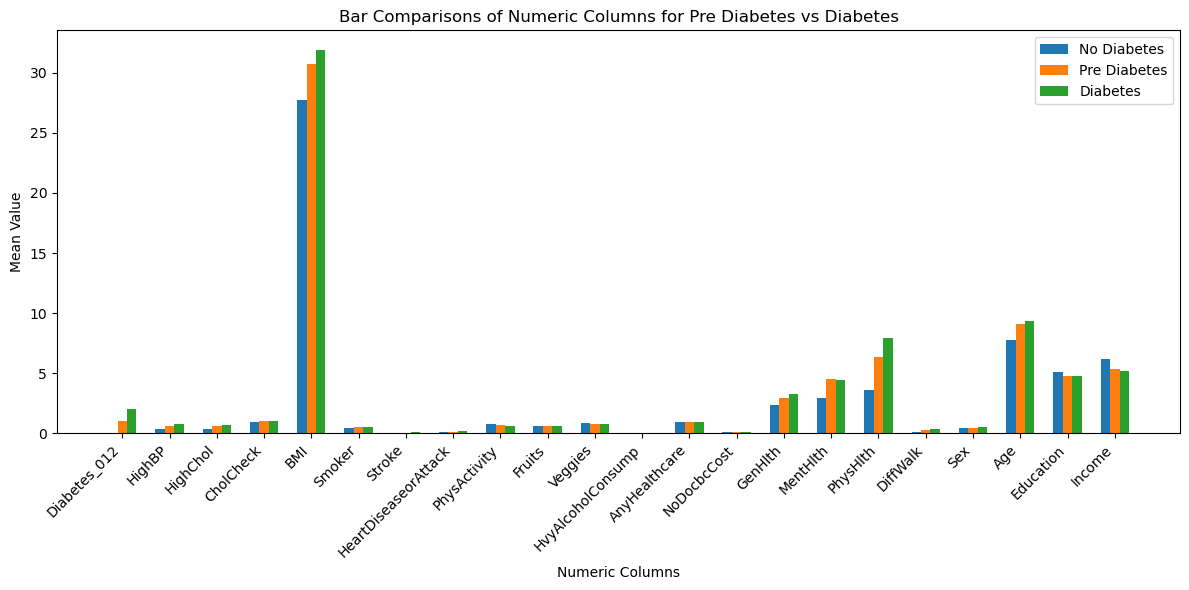

In [43]:
def plot_numeric_column_comparisons(dataframe, target_column):
    # Filter DataFrame for diabetes == 0 diabetes == 1 and diabetes == 2
    df_diabetes_0 = dataframe[dataframe['Diabetes_012'] == 0]
    df_diabetes_1 = dataframe[dataframe['Diabetes_012'] == 1]
    df_diabetes_2 = dataframe[dataframe['Diabetes_012'] == 2]

    # Calculate mean for numeric columns in both DataFrames
    numeric_columns = dataframe.select_dtypes(include='number').columns
    means_diabetes_0 = df_diabetes_0[numeric_columns].mean()
    means_diabetes_1 = df_diabetes_1[numeric_columns].mean()
    means_diabetes_2 = df_diabetes_2[numeric_columns].mean()

    # Create a grouped bar plot for each numeric column
    num_columns = len(numeric_columns)
    width = 0.2
    x = range(num_columns)
    fig, ax = plt.subplots(figsize=(12, 6))
    bars_diabetes_0 = ax.bar(x, means_diabetes_0, width, label="No Diabetes")
    bars_diabetes_1 = ax.bar([i + width for i in x], means_diabetes_1, width, label="Pre Diabetes")
    bars_diabetes_2 = ax.bar([i + 2 * width for i in x], means_diabetes_2, width, label="Diabetes")

    ax.set_xlabel("Numeric Columns")
    ax.set_ylabel("Mean Value")
    ax.set_title("Bar Comparisons of Numeric Columns for Pre Diabetes vs Diabetes")
    ax.set_xticks([i + width for i in x])
    ax.set_xticklabels(numeric_columns, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot comparisons for numeric columns
plot_numeric_column_comparisons(health_df, target_column="Diabetes_012")


### *Multivariate Analysis*

### diabetes_prediction_dataset

In [44]:
# Calculate the correlation matrix
correlation_matrix = pred_df.corr()

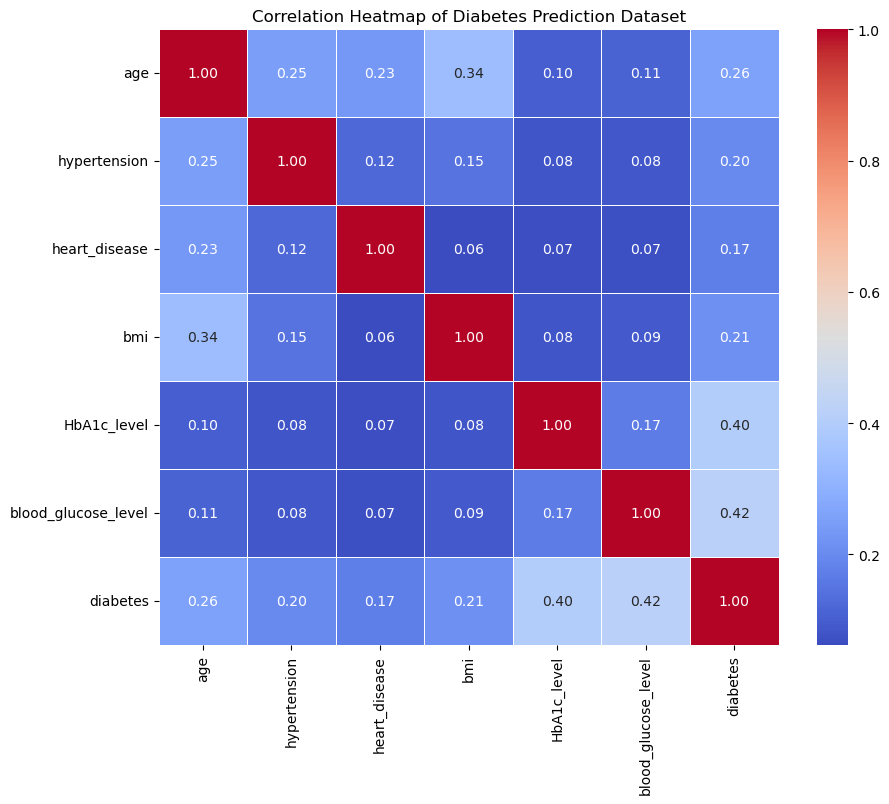

In [45]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Prediction Dataset')
plt.show()

### diabetes _ 012 _ health _ indicators

In [46]:
# Calculate the correlation matrix
correlation_matrix =health_df.corr()

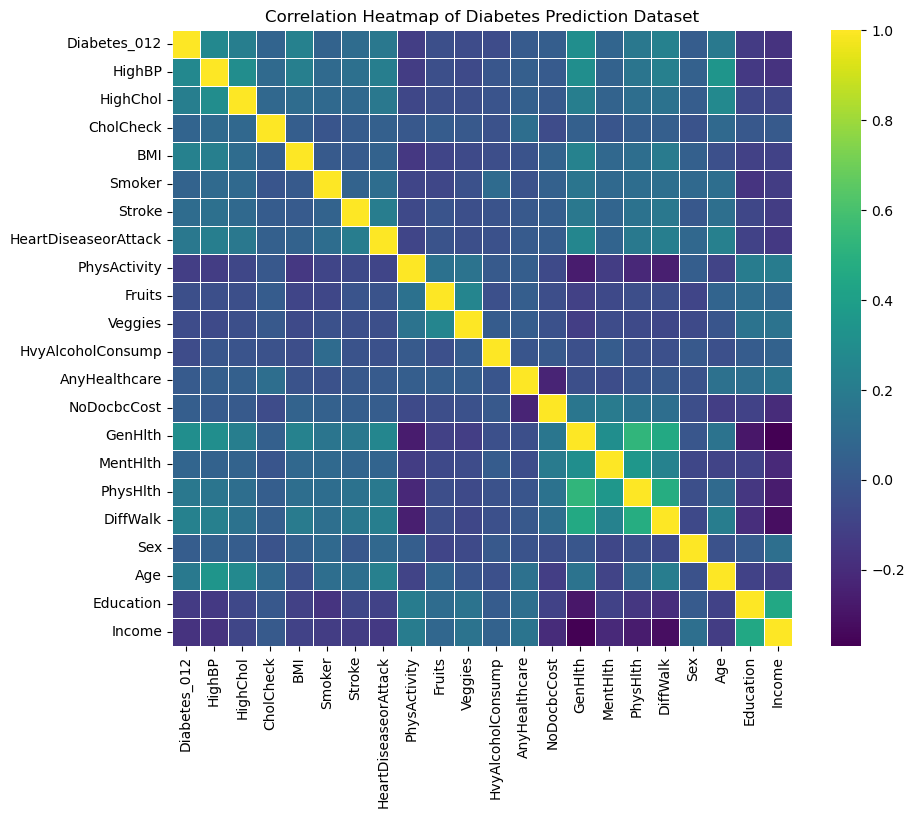

In [47]:
# Assuming you already have 'correlation_matrix' calculated from your dataset
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot= False, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Prediction Dataset')
plt.show()

#### Label Encoding the smoking_history column

In [48]:
# Creating a copy of the DataFrame to avoid modifying the original data
encoded_df = pred_df.copy()

# Creating a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'smoking_history' column
encoded_smoking = label_encoder.fit_transform(encoded_df['smoking_history'])

# Insert the 'encoded_smoking_history' column after the 'smoking_history' column
encoded_df.insert(encoded_df.columns.get_loc('smoking_history') + 1, 'encoded_smoking_history', encoded_smoking)

# Display the DataFrame with the new 'encoded_smoking_history' column
print(encoded_df)

       gender   age  hypertension  heart_disease smoking_history  \
0      Female  80.0             0              1           never   
1      Female  54.0             0              0         No Info   
2        Male  28.0             0              0           never   
3      Female  36.0             0              0         current   
4        Male  76.0             1              1         current   
...       ...   ...           ...            ...             ...   
99995  Female  80.0             0              0         No Info   
99996  Female   2.0             0              0         No Info   
99997    Male  66.0             0              0          former   
99998  Female  24.0             0              0           never   
99999  Female  57.0             0              0         current   

       encoded_smoking_history    bmi  HbA1c_level  blood_glucose_level  \
0                            4  25.19          6.6                  140   
1                            0  2

In [49]:
unique_values = encoded_df[['encoded_smoking_history', 'smoking_history']].drop_duplicates().values

In [50]:
for value in unique_values:
    encoded_smoking_history, smoking_history = value
    print(f"encoded_smoking_history: {encoded_smoking_history}, smoking_history: {smoking_history}")

encoded_smoking_history: 4, smoking_history: never
encoded_smoking_history: 0, smoking_history: No Info
encoded_smoking_history: 1, smoking_history: current
encoded_smoking_history: 3, smoking_history: former
encoded_smoking_history: 2, smoking_history: ever
encoded_smoking_history: 5, smoking_history: not current


In [51]:
# saving the encoded_df to a csv
encoded_df.to_csv('Data/Preprocessed_data.csv', index = False)

## *Conclusion*

The gender with more occurences of diabetes are Females.

Most smokers seem to quit smoking after being diagnosed with diabetes this is because smoking habits have a probability of causes smoking is a significant risk factor for developing type 2 diabetes.

As income increases there are lesser people with diabetes these could be correlated with their ability to lead healthier lifestlyes .

Those with higher level of  education also have lesser occurences of diabetes this could be associated by their ability to do better research or an understnding of the importance to led healthier lifestyles.
